# Titanic - Machine Learning from Disaster

This is the notebook of my first submission to a Kaggle competition, namely [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)! <br>
Let's have fun! (Accuracy=0.8425)

## Table of contents
1. [Set up](#Setup)
2. [Data cleaning](#datacleaning)
3. [Exploratory Data Analysis](#eda)
4. [Feature engineering](#feature_engineering)
5. [Correlation matrix](#corr_matrix)
6. [Modeling](#modeling)
7. [Hyperparameters tuning](#hyperparameters_tuning)
8. [Submission](#submission)

## Set up <a name="Setup" ></a>

Import librairies

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 5)

Load datasets

In [101]:
df_train = pd.read_csv("data/titanic/train.csv", sep=",")  # train dataset
df_test = pd.read_csv("data/titanic/test.csv", sep=",")  # test dataset

for df in [df_train, df_test]:
    df.columns = df.columns.str.lower()  # make column names lowercase

In [102]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
df_test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data cleaning <a name="datacleaning"></a>

### Check columns types

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   pclass       418 non-null    int64  
 2   name         418 non-null    object 
 3   sex          418 non-null    object 
 4   age          332 non-null    float64
 5   sibsp        418 non-null    int64  
 6   parch        418 non-null    int64  
 7   ticket       418 non-null    object 
 8   fare         417 non-null    float64
 9   cabin        91 non-null     object 
 10  embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Each Dtype looks correct!



### Let's look for outliers

#### Numeric data

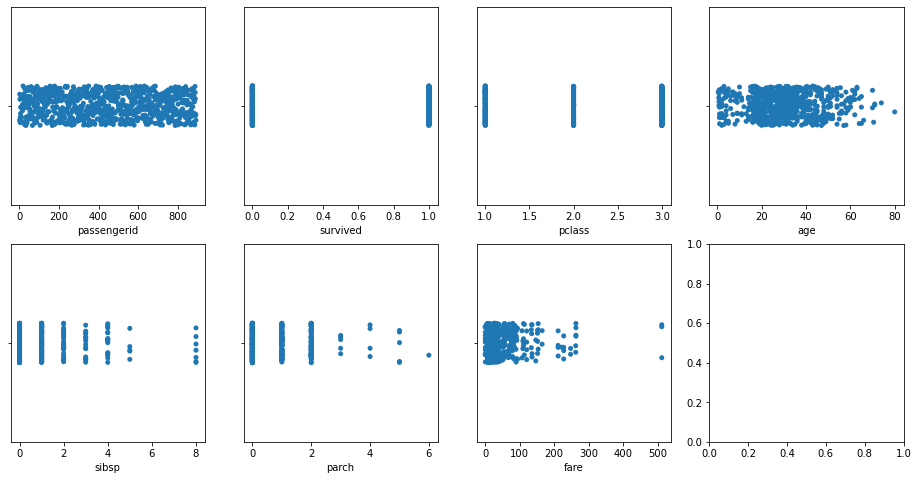

In [111]:
num_cols = df_train.select_dtypes(include="number").columns.to_list()

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()
for i, col in enumerate(num_cols):
  sns.stripplot(x=col, data=df_train, ax=axs[i])

According to the plots, there seems to be no outliers in our numeric columns

#### Categorical data

In [23]:
cat_cols = df_train.select_dtypes(exclude="number").columns.to_list()
cat_cols

['name', 'sex', 'ticket', 'cabin', 'embarked']

In [24]:
with pd.option_context("display.max_rows", None):
  print(df_train["cabin"].value_counts())

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58          

There seems to be no outliers/weird values in the categorical data. We can note however that some people have several cabins. We'll use that later to see whether it is useful for our prediction

### Check for missing values

#### Train data

In [11]:
df_train.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64



1. _Age_: __177__ missing values is a lot. Let's fill them with the median age of each title group (title is "Mr.", "Miss", in the name of the passengers)
2. _Cabin_: __687__ missing values is also a lot. We'll skip this feature for now (we'll take care of it in the Feature Engineering phase).
3. _Embarked_: only __2__ missing values. These ones can be discarded.



#### Test data

In [12]:
df_test.isna().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

For the test dataframe, some ages values are missing too as well as cabin values. We'll fill them the same way as for the train dataset.
However, a fare is also, missing, we need to take care of that one.

### Take care of missing values

#### Age

In [112]:
for df in [df_train, df_test]:
    df["title"] = [x.split(", ")[1].split()[0] for x in df["name"]] # create a "title" feature

df_train["title"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: title, dtype: int64

Fill missing values with the median age of each title group

In [113]:
for df in [df_train, df_test]:
    df['age'] = df.groupby(["title"])['age'].transform(lambda x: x.fillna(x.median()))

c:\users\izeme\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [27]:
df_train["age"].isna().sum(), df_test["age"].isna().sum()

(0, 1)

In [30]:
df_test.loc[df_test["age"].isna(), :]

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms.


There is still a missing value for *age* in the test dataframe (because that person has a unique title in that dataset "Ms"). Let's fill it with the median of "Ms." in the training dataset.

In [31]:
df_test.loc[df_test["age"].isna(), "age"] = df_train.groupby(["title"])['age'].median()["Ms."]

In [32]:
df_test["age"].isna().sum()

0

### Embarked

Drop null values for "embarked" in the train dataset

In [33]:
df_train.dropna(subset=["embarked"], inplace=True)

### Fare

In [34]:
df_test.loc[df_test["fare"].isna(), :]

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr.


Let's impute the median fare of his category (male + 3rd class)

In [35]:
df_test["fare"] = df_test.groupby(["sex", "pclass"])["fare"].transform(lambda x: x.fillna(x.median()))

Let's check the missing values now

In [36]:
df_train.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         0
title            0
dtype: int64

In [37]:
df_test.isna().sum()

passengerid      0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          327
embarked         0
title            0
dtype: int64

## Exploratory Data Analysis (EDA) <a name="eda"></a>

Let's have a quick look at the influence of our variables on the target variable *survived*

In [38]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


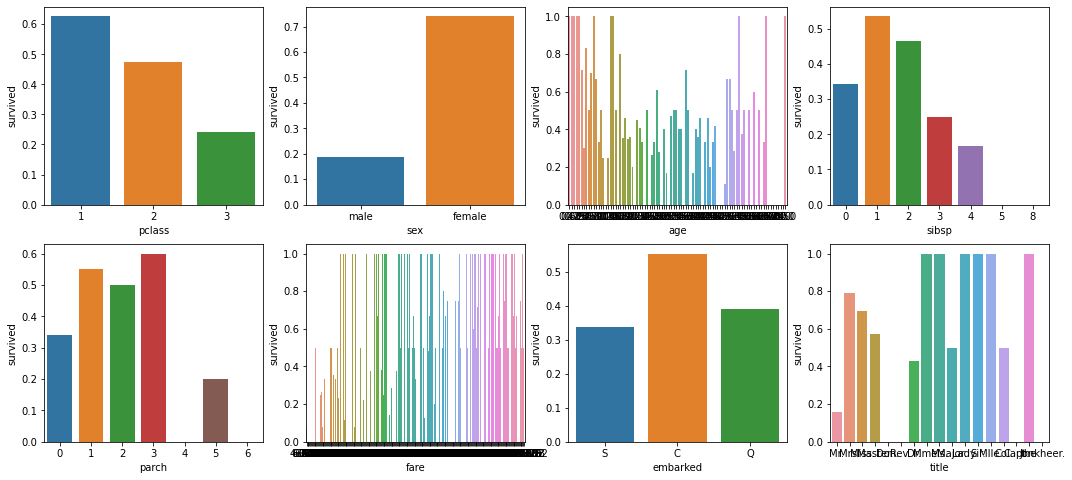

In [42]:
cols = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked", "title"]

fig, axs = plt.subplots(2, 4, figsize=(18, 8))
axs = axs.flatten()

for i, col in enumerate(cols):
  sns.barplot(x=col, y="survived", data=df_train, ci=None, ax=axs[i])

According to these plots:
* *pclass* and *sex* seem to have a strong effect on *survived*
* *sibsp*, *parch* and *embarked* seem to have kind of an effect
* *age* and *fare* need to be chunked to have a better idea
* *title* seems to have an effect too

## Feature engineering <a name="feature_engineering"></a>

So far, we've checked for any outliers and we've taken care of the missing values in _age_ and _embarked_. We added a _title_ column. We also quickly looked at the effect of our variables on *survived*.

Lets now see what we can harness the potential of our variables.

* _age_: make chunks of *age* (0-10, 10-20, ...)
* _fare_: make chunks of *fare* (0-10, 10-20, ...)
* _sibsp_	& _parch_:
  1. Make a column *n_relatives* by simply adding *sibsp* and *parch*
  2. Make a binary column *has_relatives*, 1 if passsenger has at least one relative, 0 if not
* _cabin_:
  1. Make a column *n_cabins* to see how many relatives a passenger has
  2. Make a binary column *has_cabin*, 1 if passsenger has at least one cabin, 0 if not
  3. Get only the letter from *cabin* to have only a few categories (and add a label for the NaN)

In [43]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


### Age

Make age chunks

In [44]:
for df in [df_train, df_test]:
    df['age_chunk'] = pd.cut(x=df["age"],
                             bins=np.arange(0, 81, 10))

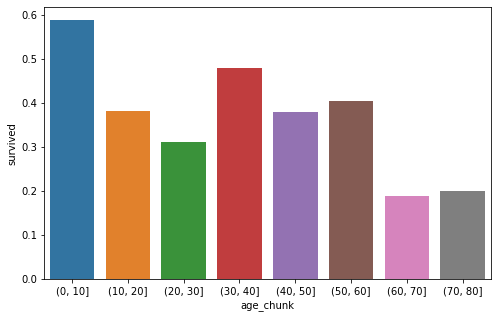

In [46]:
sns.barplot(x="age_chunk", y="survived", data=df_train, ci=None);

*age_chunk* seems to have somewhat of a negative effect on the survival rate

### Fare

Make fare chunks

In [47]:
for df in [df_train, df_test]:
    df['fare_chunk'] = pd.cut(x=df["fare"],
                              bins=list(np.arange(0, 176, 15)) + [600],
                              right=False)

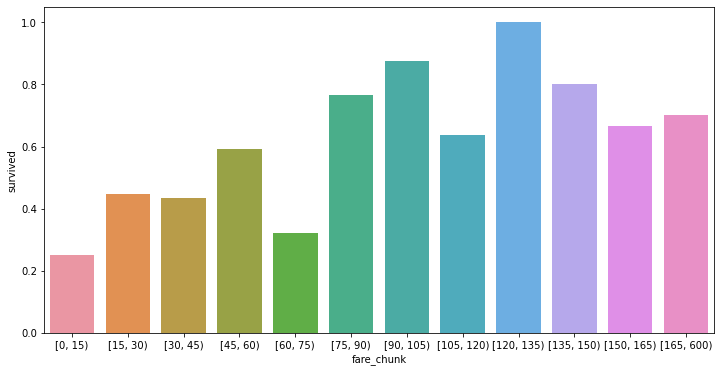

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x="fare_chunk", y="survived", data=df_train, ci=None);

Looks like *fare_chunk* has a medium positive effect on the survived rate!

### sibsp & parch

Make a column n_relatives by simply adding *sibsp* and *parch*

In [51]:
for df in [df_train, df_test]:
    df["n_relatives"] = df["sibsp"] + df["parch"]

df_train[["sibsp", "parch", "n_relatives"]].head()

,sibsp,parch,n_relatives
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


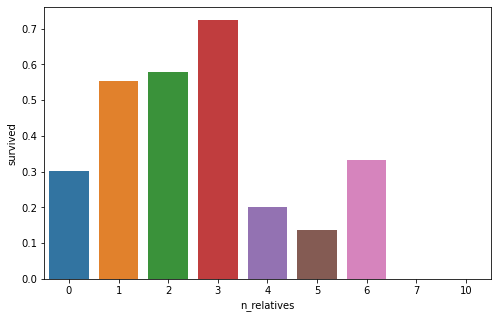

In [52]:
sns.barplot(x="n_relatives", y="survived", data=df_train, ci=None);

People with 1 to 3 relatives survived much better than the others!

Make a binary column has_relatives with *sibsp* and *parch*, 1 if passsenger has at least one relative, 0 if not

In [53]:
for df in [df_train, df_test]:
    df["has_relatives"] = np.where(df["n_relatives"] > 0, 1, 0)

df_train[["n_relatives", "has_relatives"]].head()

,n_relatives,has_relatives
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


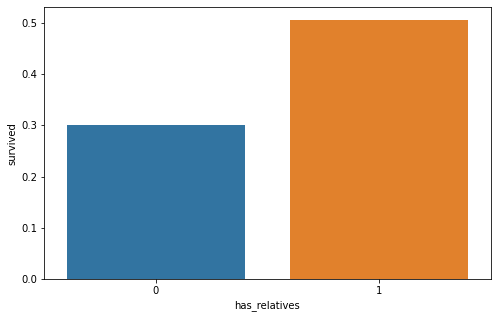

In [54]:
sns.barplot(x="has_relatives", y="survived", data=df_train, ci=None);

With this binary variable, the effect of having a relative is clear. But we might lose information by doing this. I think it is more relevant to use a the previous *n_relatives* variable for relatives; we'll see with the correlation matrix.

### cabin

Make a column *n_cabins* to see how many cabins a passenger has


In [55]:
for df in [df_train, df_test]:
    df["n_cabins"] = [0 if pd.isna(x) else len(x.split()) for x in df["cabin"]]
    
df_train[["cabin", "n_cabins"]].head()

,cabin,n_cabins
0,NaN,0
1,C85,1
2,NaN,0
3,C123,1
4,NaN,0


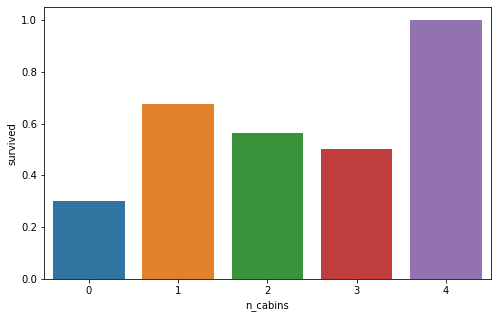

In [56]:
sns.barplot(x="n_cabins", y="survived", data=df_train, ci=None);

People with 1+ cabins survived better than people with none! In this case, we can use a binary variable has/has not cabin (see next)

Make a binary column *has_cabin*, 1 if passsenger has at least one cabin, 0 if not



In [57]:
for df in [df_train, df_test]:
    df["has_cabin"] = np.where(df["n_cabins"] > 0, 1, 0)

df_train[["n_cabins", "has_cabin"]].head()

,n_cabins,has_cabin
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


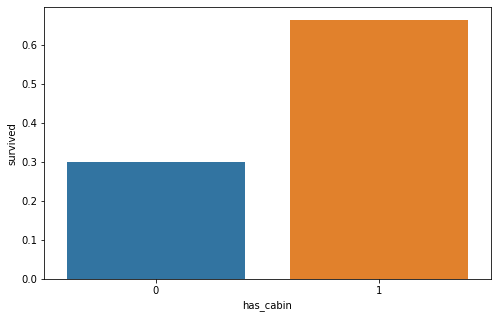

In [58]:
sns.barplot(x="has_cabin", y="survived", data=df_train, ci=None);

Get only the letter from *cabin* to have only a few categories (and add a label "N" for the NaN)

In [59]:
for df in [df_train, df_test]:
    df["cabin_letter"] = ["N" if pd.isna(x) else x[0] for x in df["cabin"]]
df_train[["cabin", "cabin_letter"]].head()

,cabin,cabin_letter
0,NaN,N
1,C85,C
2,NaN,N
3,C123,C
4,NaN,N


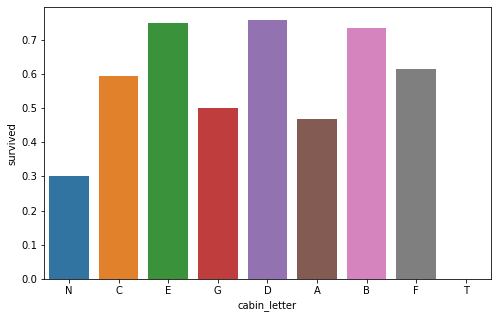

In [60]:
sns.barplot(x="cabin_letter", y="survived", data=df_train, ci=None);

People with a cabin starting with A and G seem to have a smaller survival rate than the other people with a cabin. But nothing very significant in my opinion.

### Conclusion of this part
We created some new features that may/or may not increase the accuracy of our model. We'll test them!

## Correlation matrix <a name="corr_matrix"></a>

Let's use a correlation matrix to have an idea of the relationship of each feature with the target variable (+ the relationship of each feature with each other).

In [61]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,age_chunk,fare_chunk,n_relatives,has_relatives,n_cabins,has_cabin,cabin_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,"(20, 30]","[0, 15)",1,1,0,0,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,"(30, 40]","[60, 75)",1,1,1,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,"(20, 30]","[0, 15)",0,0,0,0,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,"(30, 40]","[45, 60)",1,1,1,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,"(30, 40]","[0, 15)",0,0,0,0,N


Let's transform the categorical data to numerical data for plotting purposes

In [62]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ["sex", "embarked", "title", "age_chunk", "fare_chunk", "cabin_letter"]

for col in cols_to_encode:
  le = LabelEncoder()
  df_train[col + "_enc"] = le.fit_transform(df_train[col])

In [63]:
df_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'title', 'age_chunk',
       'fare_chunk', 'n_relatives', 'has_relatives', 'n_cabins', 'has_cabin',
       'cabin_letter', 'sex_enc', 'embarked_enc', 'title_enc', 'age_chunk_enc',
       'fare_chunk_enc', 'cabin_letter_enc'],
      dtype='object')

Correlation matrix (big one) with all features possible to see which one is useless/redundant from the ones we created (ex. *age* vs *age_chunk* or *n_cabins* vs *has_cabins*)

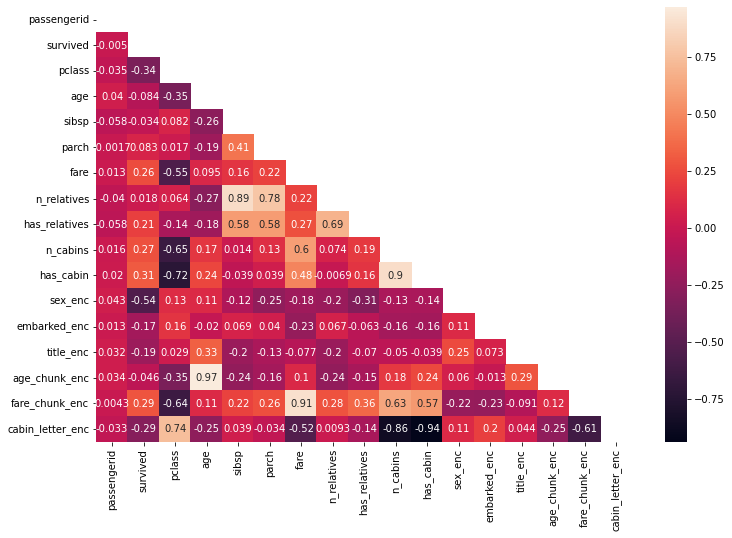

In [65]:
corr = df_train.corr()
triu = np.triu(corr)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, mask=triu);

In [66]:
corr.loc["survived", :].abs().sort_values(ascending=False)

survived            1.000000
sex_enc             0.541585
pclass              0.335549
has_cabin           0.313435
cabin_letter_enc    0.290684
fare_chunk_enc      0.289328
n_cabins            0.274282
fare                0.255290
has_relatives       0.206207
title_enc           0.193873
embarked_enc        0.169718
age                 0.083703
parch               0.083151
age_chunk_enc       0.045775
sibsp               0.034040
n_relatives         0.018277
passengerid         0.005028
Name: survived, dtype: float64

*sex*, *pclass*, *has_cabin* & *fare_chunk* looks promising

## Modeling <a name="modeling"></a>

In [84]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score

In [85]:
# after trying out several combinations of features, I ended up with these features (they gave the best results)
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'has_cabin', 'title']

OneHotEncode categorical variables (we need to concat the two dataframes and OneHotEncode the concat dataframe because the train & test dataframe do not contains the same titles)

In [86]:
# concat the two df
df_train["train"] = 1
df_test["train"] = 0
df_test["survived"] = np.nan
df_all = pd.concat([df_train[features + ["train"]], df_test[features + ["train"]]])

# created dummy variables from categories (use pd.get_dummies and not OneHotEncoder to keep track of the "test" column)
df_all_dummies = pd.get_dummies(df_all)

# lets get back our train & test dataframes
df_train_dummies = df_all_dummies.loc[df_all_dummies["train"] == 1, :]
df_test_dummies = df_all_dummies.loc[df_all_dummies["train"] == 0, :]

In [87]:
df_train_dummies.head()

,pclass,age,sibsp,parch,fare,has_cabin,train,sex_female,sex_male,embarked_C,...,title_Master.,title_Miss.,title_Mlle.,title_Mme.,title_Mr.,title_Mrs.,title_Ms.,title_Rev.,title_Sir.,title_the
0,3,22.0,1,0,7.2500,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,7.9250,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,8.0500,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Scale numerical variables

In [88]:
# scale the variables 'pclass', 'age', 'sibsp', 'parch', 'fare'
df_train_dummies_scaled = df_train_dummies.copy()
df_test_dummies_scaled = df_test_dummies.copy()

for df in [df_train_dummies_scaled, df_test_dummies_scaled]:
    scaler = StandardScaler()
    df[['pclass', 'age', 'sibsp', 'parch', 'fare']] = scaler.fit_transform(df[['pclass', 'age', 'sibsp', 'parch', 'fare']])

In [89]:
df_train_dummies_scaled.head()

,pclass,age,sibsp,parch,fare,has_cabin,train,sex_female,sex_male,embarked_C,...,title_Master.,title_Miss.,title_Mlle.,title_Mme.,title_Mr.,title_Mrs.,title_Ms.,title_Rev.,title_Sir.,title_the
0,0.825209,-0.555324,0.431350,-0.474326,-0.500240,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.572211,0.654560,0.431350,-0.474326,0.788947,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.825209,-0.252853,-0.475199,-0.474326,-0.486650,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-1.572211,0.427706,0.431350,-0.474326,0.422861,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.825209,0.427706,-0.475199,-0.474326,-0.484133,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Make our X_train & X_test & y_train dataframes

In [90]:
X_train = df_train_dummies_scaled.loc[ df_train_dummies_scaled["train"] == 1, : ].drop(columns="train")
X_test = df_test_dummies_scaled.loc[ df_test_dummies_scaled["train"] == 0, : ].drop(columns="train")

y_train = df_train["survived"]

Lets test some models

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [54]:
lr = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
knn = KNeighborsClassifier()

models = [lr, dt, rf, gb, svc, knn]
for model in models:
  cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
  print(f"{model}: {cv_score:.4f}")

LogisticRegression(random_state=0): 0.8302
DecisionTreeClassifier(): 0.7784
RandomForestClassifier(): 0.8099
GradientBoostingClassifier(): 0.8403
SVC(): 0.8347
KNeighborsClassifier(): 0.8088


## Hyperparameters tuning <a name="hyperparameters_tuning"></a>

### Let's tune the best model: GradientBoostingClassifier

#### Using RandomizedSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [56]:
parameters = {
    "learning_rate": [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    "n_estimators": [1, 2, 4, 8, 16, 32, 64, 100, 200, 500],
    "max_depth": np.arange(1, 33),
}

In [57]:
rand_grid = RandomizedSearchCV(gb, parameters, n_iter=300, scoring="accuracy", n_jobs=-1, cv=3, verbose=1)
rand_grid.fit(X_train, y_train)

print(rand_grid.best_estimator_)
print(rand_grid.best_score_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min


GradientBoostingClassifier(learning_rate=0.01)
0.8279150362483696


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.5min finished


#### Using GridSearchCV

In [58]:
param_grid = {
    "learning_rate": np.arange(0.05, 0.16, 0.01),
    "n_estimators": np.arange(495, 506, 1),
    "max_depth": np.arange(1.7, 2.4, 0.1),
    }

In [59]:
grid = GridSearchCV(gb, param_grid, scoring="accuracy", n_jobs=-1, cv=3, verbose=1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 3 folds for each of 847 candidates, totalling 2541 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2541 out of 2541 | elapsed:  6.7min finished


GradientBoostingClassifier(max_depth=2.3000000000000007, n_estimators=497)
0.831293414626748


The hyperparmeters tuning did not led to better results than with the default parameters of the GradientBoosingClassifier. We'll stick with them then.

In [60]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
cv_score = cross_val_score(gb, X_train, y_train, cv=5).mean()
print(f"{gb}: {cv_score:.4f}")

GradientBoostingClassifier(): 0.8425


## Submission <a name="submission"></a>

In [3]:
# gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
# gb.fit(X_train, y_train)
# predictions = gb.predict(X_test)

# output = pd.DataFrame({'PassengerId': df_test["passengerid"], 'Survived': predictions})
# output.to_csv('submission.csv', index=False)